<a href="https://colab.research.google.com/github/minasd2001/ml-journey/blob/main/hands-on-ml/03-classification/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset


In [ ]:
from sklearn.datasets import fetch_openml

mnist =fetch_openml('mnist_784', as_frame=False)

as_frame=False => to get the data as Numpy array

In [ ]:
X, y = mnist.data , mnist.target

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape # 70k pictures of 28*28 pixels

(70000, 784)

In [ ]:
y.shape

(70000,)

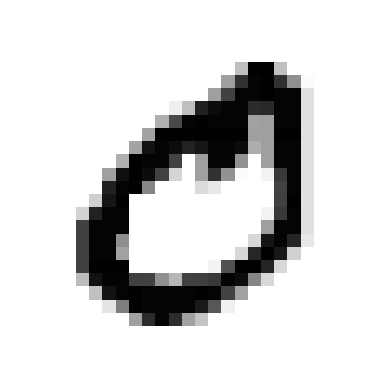

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image,cmap="binary")
  plt.axis("off")

some_digit= X[21]
plot_digit(some_digit)
plt.show()

cmap="binary" -> to get a grayscale color map



In [ ]:
y[21]

'0'

In [ ]:
# the returned dataset is preshuffled by fetch_openml

X_train, y_train, X_test, y_test = X[:6000],y[:6000],X[6000:],y[6000:]

# Training a binary classifier

trainning to identify 5

In [ ]:
# create target vectors

y_train_5 = (y_train == '5') # false for non five
y_test_5 = (y_test == '5')

Picking SGD as the clssifier
well suited for very large datasets

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([False])

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

# Measuring accuracy using cross_validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv =3, scoring="accuracy")


array([0.962 , 0.956 , 0.9665])

dummy classifier gives every image the most frequent class

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf,X_train, y_train_5, cv =3, scoring="accuracy")

array([0.914 , 0.9145, 0.9145])

because there are very few 5s in the dataset, even without a proper model it will always have very high accuracy for being 5 or not

**>***For skewed data, accuracy is not good performane measurment***

# Confusion Matrix

Count the number of times instance of a class A was misclassfied as class B.
Look at row 8 and column 0 for all the number of times 8 was confused with 0.

Performs k-fold.


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

cm

array([[5375,  111],
       [ 120,  394]])

[[correct as non-5, false positive][wrong as non-5 , true positive]]

In [ ]:
y_train_perfect_predictions = y_train_5 # # pretend we reached perfection

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[5486,    0],
       [   0,  514]])

**Precision**

TP/ TP+FP

**Recall**

TP/TP+FN

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) #guessed 5s/ all the guessed 5s

0.7801980198019802

In [ ]:
recall_score(y_train_5, y_train_pred) # guessed 5s/ all the 5s

0.7665369649805448

Only guesses an image is 5, 78 percent of time, and detects 76 percent of the 5s.

**F1 score**

The F1 score is the harmonic mean of precision and recall . Whereas the regular mean treats all values equally, the
 harmonic mean gives much more weight to **low values. As a result, the
 classifier will only get a high F score if both recall and precision are high**.

**F1 = 2TP / 2TP+FP+FN**

In [ ]:
 from sklearn.metrics import f1_score

 f1_score(y_train_5, y_train_pred)

0.7733071638861629